# Subsampling and reconstruction


Consider an image as a discrete 2D sampled signal denoted as I(x,y), where x and y are the position indices on the images. Crop or resize your image such that its number of rows and columns are a power of 2 greater than 8. For integer sub-sampling factors D = 21,22,··· ,28, grid the image domain uniformly in x and y, giving Nx × Ny uniform rectangular grid sample regions. Each region will be subsampled using a unique optimal number in some sense

a.  In the MSE sense, present the sub-sampled image for all different D. Denote
 these sub-sampled images by $ \{ \tilde{J_i} \}_{i=1}^{8} .$ Show the MSE as a function of the integer
 sub-sampling factor D.

 b.  In the MAD sense, present the sub-sampled image for all different D. Denote
 these sub-sampled images by $ \{ \tilde{J_i} \}_{i=1}^{8} .$ Show the MAD as a function of the integer sub-sampling factor D.

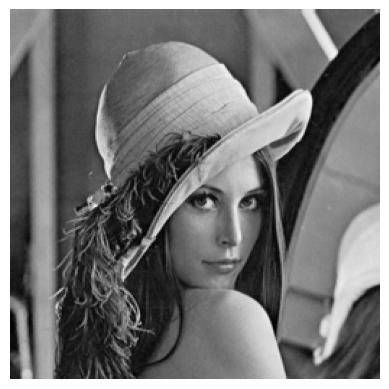

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

url = 'https://www.math.hkust.edu.hk/~masyleung/Teaching/CAS/MATLAB/image/images/lenna.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale

image = image.resize((256, 256))
image_array = np.array(image)

plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()


Subsampling: Reducing the spatial resolution of an image by selecting a subset of its pixels.
Subsampling Factor D: Determines how much the image is downsampled. For $D=2^n$, you reduce the number of pixels by a factor of D in both dimensions.

## Subsampling in MSE Sense

In [4]:
def subsample_image_mse(image_array, D):
    """
    Subsamples the image in the MSE sense.

    Parameters:
    - image_array: Original image as a NumPy array.
    - D: Subsampling factor (must be an integer power of 2).

    Returns:
    - subsampled_image: Subsampled image.
    """
    N = image_array.shape[0]
    # Number of blocks
    num_blocks = N // D
    subsampled_image = np.zeros((num_blocks, num_blocks))

    for i in range(num_blocks):
        for j in range(num_blocks):
            # Extract the block
            block = image_array[i*D:(i+1)*D, j*D:(j+1)*D]
            # Compute the mean of the block (minimizes MSE)
            block_mean = np.mean(block)
            subsampled_image[i, j] = block_mean

    return subsampled_image


# Subsampling in MAD Sense

In [5]:
def subsample_image_mad(image_array, D):
    """
    Subsamples the image in the MAD sense.

    Parameters:
    - image_array: Original image as a NumPy array.
    - D: Subsampling factor (must be an integer power of 2).

    Returns:
    - subsampled_image: Subsampled image.
    """
    N = image_array.shape[0]
    num_blocks = N // D

    subsampled_image = np.zeros((num_blocks, num_blocks))

    for i in range(num_blocks):
        for j in range(num_blocks):
            block = image_array[i*D:(i+1)*D, j*D:(j+1)*D]
            # Compute the median of the block (minimizes MAD)
            block_median = np.median(block)
            subsampled_image[i, j] = block_median

    return subsampled_image

# Applying Subsampling for Different D Values

In [11]:
D_values = [2**i for i in range(1, 9)]

subsampled_images_mse = []
subsampled_images_mad = []
mse_values = []
mad_values = []

for D in D_values:
    subsampled_mse = subsample_image_mse(image_array, D)
    subsampled_images_mse.append(subsampled_mse)
    subsampled_mad = subsample_image_mad(image_array, D)
    subsampled_images_mad.append(subsampled_mad)

    # Calculate MSE
    reconstructed_mse = np.repeat(np.repeat(subsampled_mse, D, axis=0), D, axis=1)
    mse = np.mean((image_array - reconstructed_mse) ** 2)
    mse_values.append(mse)

    # Calculate MAD
    reconstructed_mad = np.repeat(np.repeat(subsampled_mad, D, axis=0), D, axis=1)
    mad = np.mean(np.abs(image_array - reconstructed_mad))
    mad_values.append(mad)


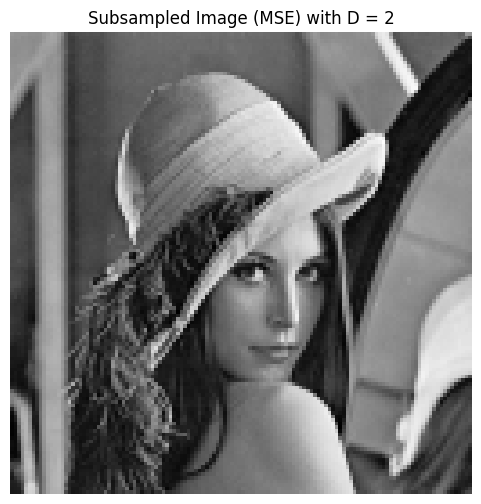

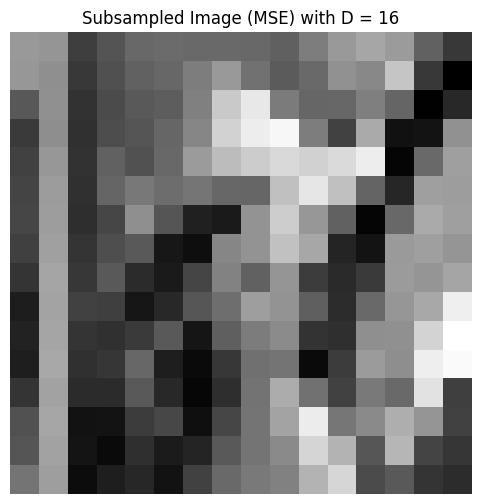

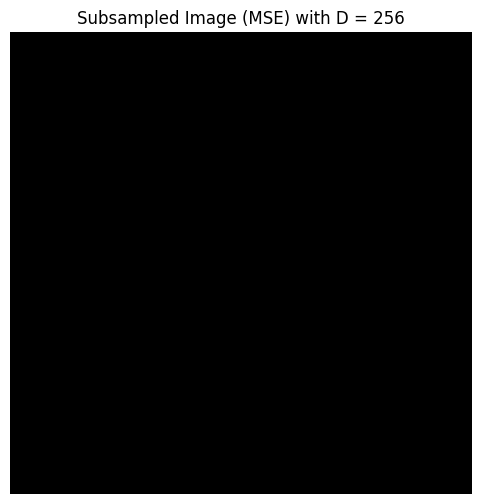

In [8]:
representative_indices = [0, 3, 7]  # Corresponding to D = 2^1, 2^4, 2^8

for idx in representative_indices:
    D = D_values[idx]
    subsampled_image = subsampled_images_mse[idx]

    plt.figure(figsize=(6, 6))
    plt.imshow(subsampled_image, cmap='gray', interpolation='nearest')
    plt.title(f'Subsampled Image (MSE) with D = {D}')
    plt.axis('off')
    plt.show()


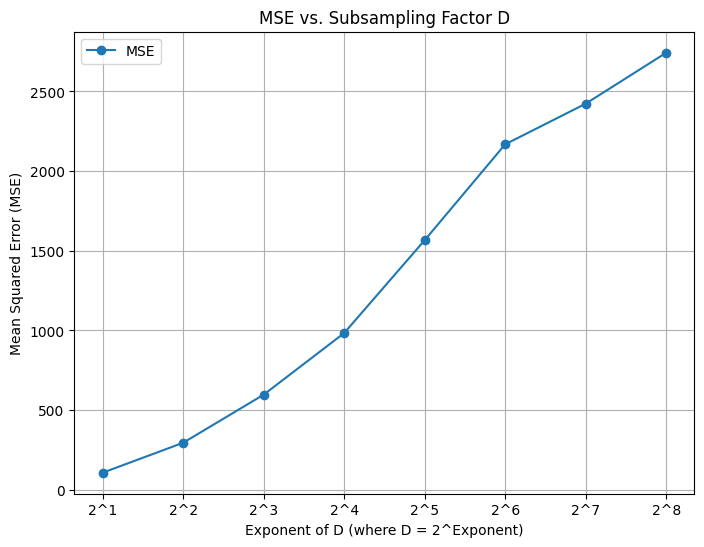

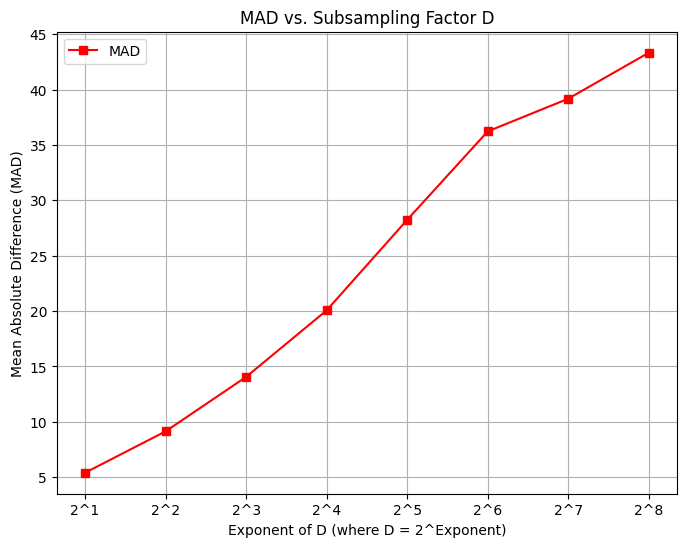

In [12]:
import matplotlib.ticker as ticker

# Convert D_values to exponents for plotting
exponents = [np.log2(D) for D in D_values]

# Plot MSE
plt.figure(figsize=(8, 6))
plt.plot(exponents, mse_values, marker='o', label='MSE')
plt.title('MSE vs. Subsampling Factor D')
plt.xlabel('Exponent of D (where D = 2^Exponent)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(exponents, [f'2^{int(exp)}' for exp in exponents])
plt.grid(True)
plt.legend()
plt.show()

# Plot MAD
plt.figure(figsize=(8, 6))
plt.plot(exponents, mad_values, marker='s', color='red', label='MAD')
plt.title('MAD vs. Subsampling Factor D')
plt.xlabel('Exponent of D (where D = 2^Exponent)')
plt.ylabel('Mean Absolute Difference (MAD)')
plt.xticks(exponents, [f'2^{int(exp)}' for exp in exponents])
plt.grid(True)
plt.legend()
plt.show()


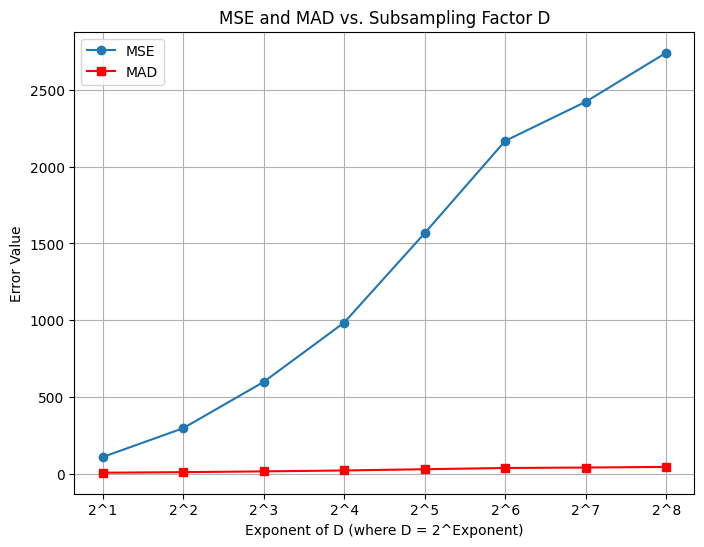

In [13]:
import matplotlib.ticker as ticker

# Convert D_values to exponents for plotting
exponents = [np.log2(D) for D in D_values]

# Plot MSE and MAD on the same plot
plt.figure(figsize=(8, 6))
plt.plot(exponents, mse_values, marker='o', label='MSE')
plt.plot(exponents, mad_values, marker='s', color='red', label='MAD')
plt.title('MSE and MAD vs. Subsampling Factor D')
plt.xlabel('Exponent of D (where D = 2^Exponent)')
plt.ylabel('Error Value')
plt.xticks(exponents, [f'2^{int(exp)}' for exp in exponents])
plt.grid(True)
plt.legend()
plt.show()


# Reconstruction of the Subsampled Images
Upsample the subsampled images back to the original size using nearest-neighbor interpolation

In [14]:
reconstructed_images_mse = []
reconstructed_images_mad = []

for idx, D in enumerate(D_values):
    # Reconstruct MSE subsampled images
    subsampled_mse = subsampled_images_mse[idx]
    reconstructed_mse = np.repeat(np.repeat(subsampled_mse, D, axis=0), D, axis=1)
    reconstructed_images_mse.append(reconstructed_mse)

    # Reconstruct MAD subsampled images
    subsampled_mad = subsampled_images_mad[idx]
    reconstructed_mad = np.repeat(np.repeat(subsampled_mad, D, axis=0), D, axis=1)
    reconstructed_images_mad.append(reconstructed_mad)


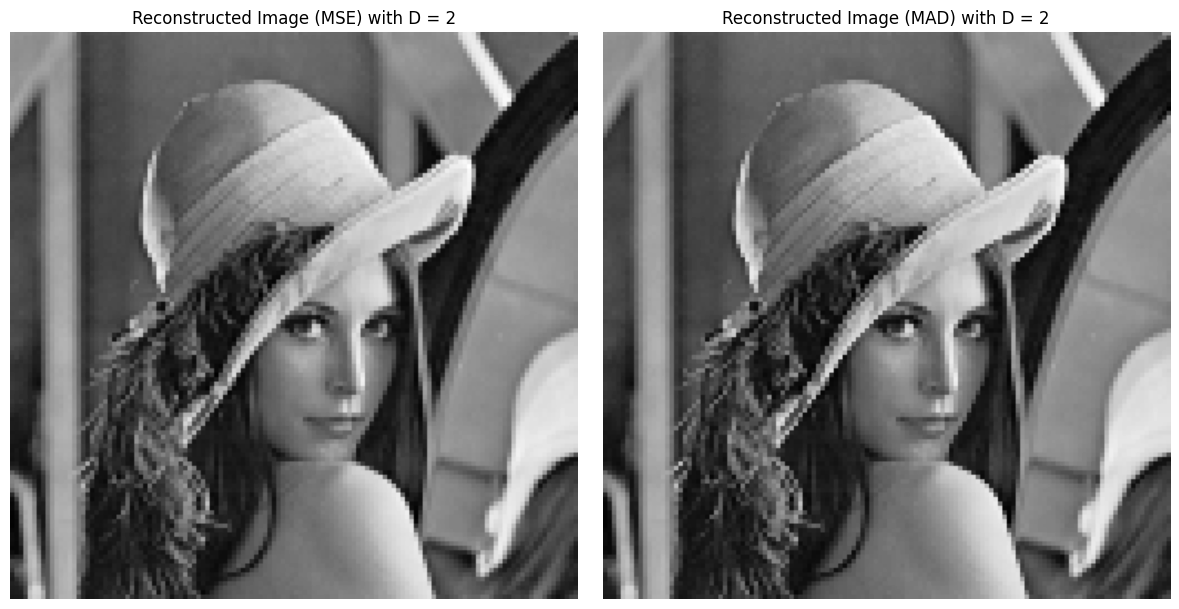

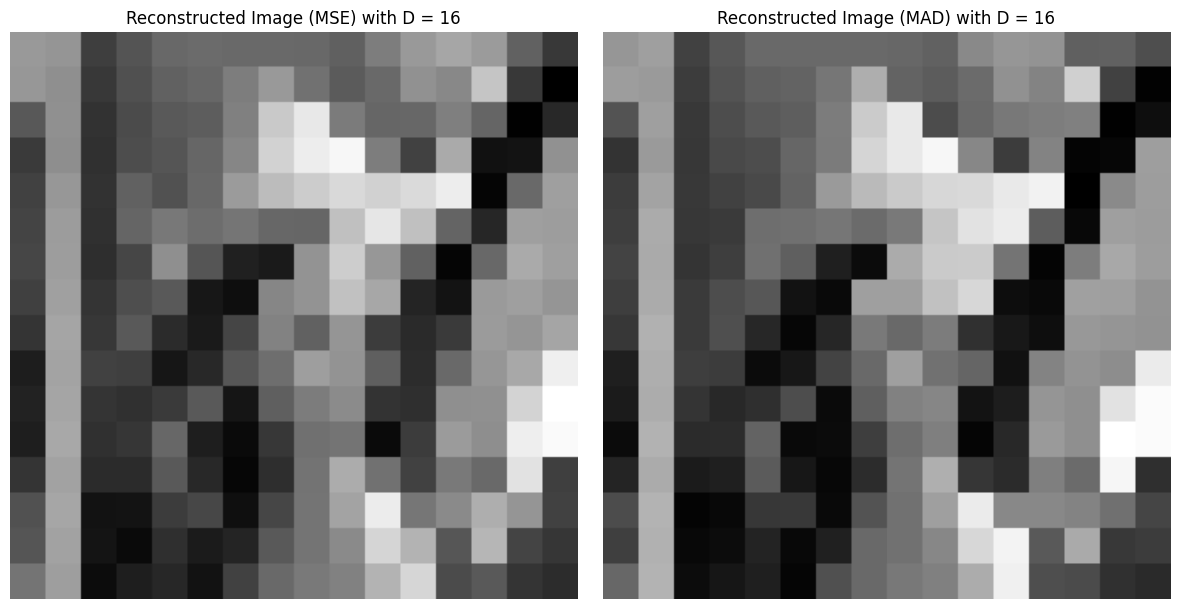

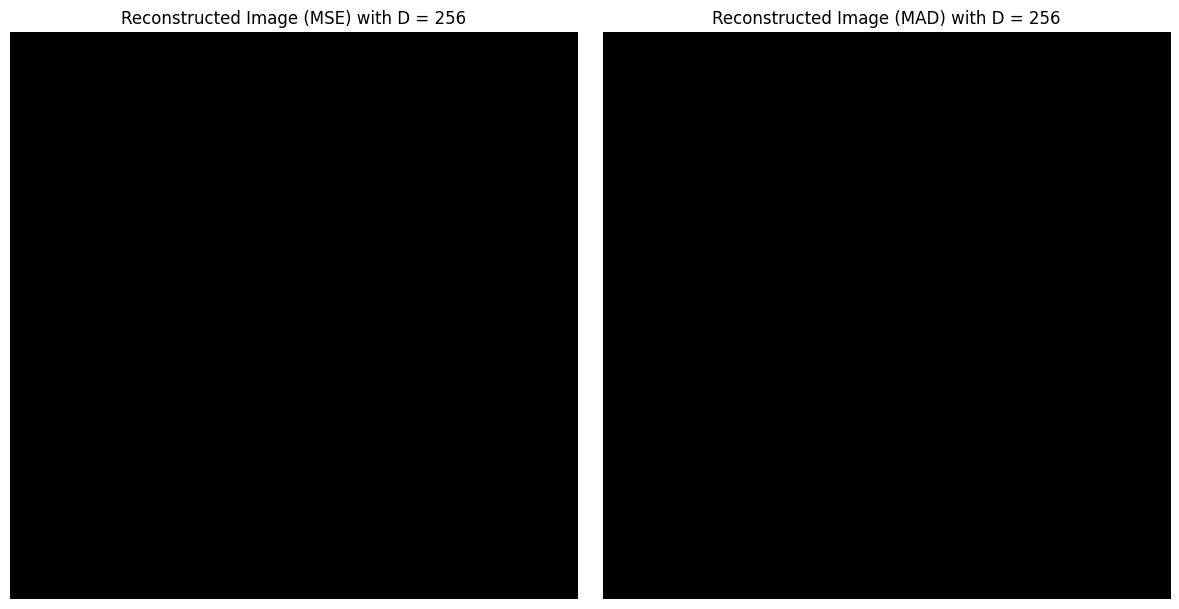

In [16]:
for idx in representative_indices:
    D = D_values[idx]
    reconstructed_mse = reconstructed_images_mse[idx]
    reconstructed_mad = reconstructed_images_mad[idx]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Display MSE reconstructed image
    axes[0].imshow(reconstructed_mse, cmap='gray')
    axes[0].set_title(f'Reconstructed Image (MSE) with D = {D}')
    axes[0].axis('off')

    # Display MAD reconstructed image
    axes[1].imshow(reconstructed_mad, cmap='gray')
    axes[1].set_title(f'Reconstructed Image (MAD) with D = {D}')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


Lower D: Higher resolution, lower error, better image quality.

Higher D: Lower resolution, higher error, reduced image quality.
